In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [3]:
demo = pd.read_csv('Internet-Demographic.csv')

In [4]:
demo

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [5]:
demo.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [6]:
demo.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [8]:
demo['Country Name'] = demo['Country Name'].astype('category')
demo['Country Code'] = demo['Country Code'].astype('category')
demo['Income Group'] = demo['Income Group'].astype('category')

In [9]:
demo.dtypes


Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1> Task 1 </h1>
<h2> Insight: The birth rate data appears to have multiple peaks. The distribution seems to be right-skewed, indicating that while most birth rates fall within a lower range, there are some countries or regions with significantly higher birth rates</h2>

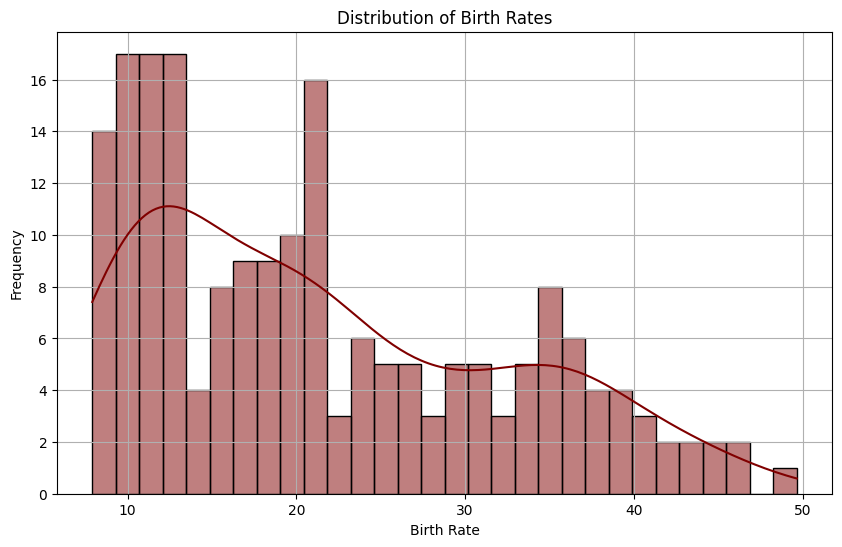

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(demo['Birth rate'], bins=30, kde=True, color='maroon')
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h1> Task 2 </h1>
<h2> Insight: The Top 5 Countries with the highest Internet Usage are Iceland, Bermuda, Norway, Sweden, and Denmark</h2>

In [16]:
top5_intersage = demo[['Country Name', 'Internet users']].nlargest(5, 'Internet users')
top5_intersage

,Country Name,Internet users
84,Iceland,96.5468
22,Bermuda,95.3000
131,Norway,95.0534
163,Sweden,94.7836
47,Denmark,94.6297


<h1> Task 3 </h1>
<h2> Insihgt: There are 67 countries in the high-income group, 50 in the lower-middle-income group, 48 in the upper-middle-income group, and 30 in the low-income group.
</h2>

In [17]:
igcounts = demo['Income Group'].value_counts()

In [19]:
igroup_counts

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

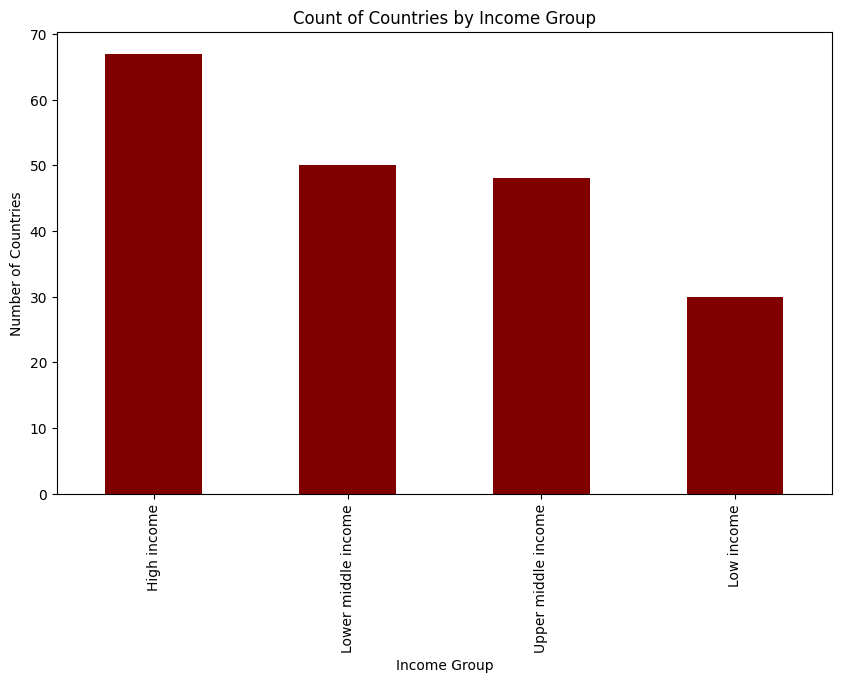

In [23]:
igroup_counts = demo['Income Group'].value_counts()

plt.figure(figsize=(10, 6))
igroup_counts.plot(kind='bar', color='maroon')
plt.title('Count of Countries by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.show()

<h1> Task 4 </h1>
<h2> Insight: A box plot for internet user</h2>

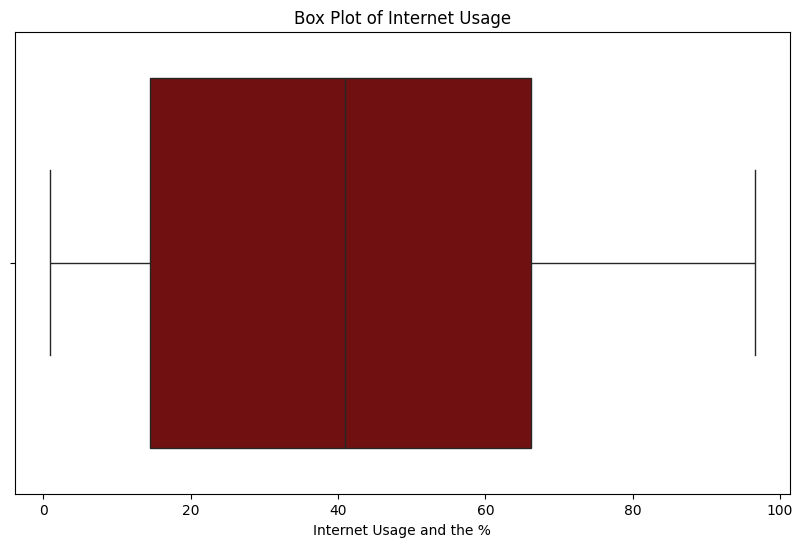

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=demo['Internet users'], color='maroon')
plt.title('Box Plot of Internet Usage')
plt.xlabel('Internet Usage and the %')
plt.show()

<h1> Task 5 </h1>
<h2> Insight: There is no countries that has a 0% internet usage </h2>

In [26]:
no_internet = demo[demo['Internet users'] == 0]
no_internet

,Country Name,Country Code,Birth rate,Internet users,Income Group


<h1> Task 6 </h1>
<h2> Insight: The average of birth rate across all countries is 21.5</h2>

In [27]:
avebirth_rate = np.round(demo['Birth rate'].mean(), 1)
avebirth_rate

np.float64(21.5)

<h1> Task 7 </h1>
<h2> Insight: The comparison between the Internet Usage and the Birth Rate seems to affect each other with Higher the Internet usage is the lower the birth rate and the higher the birth rate is the lower the Intternet Usage</h2>

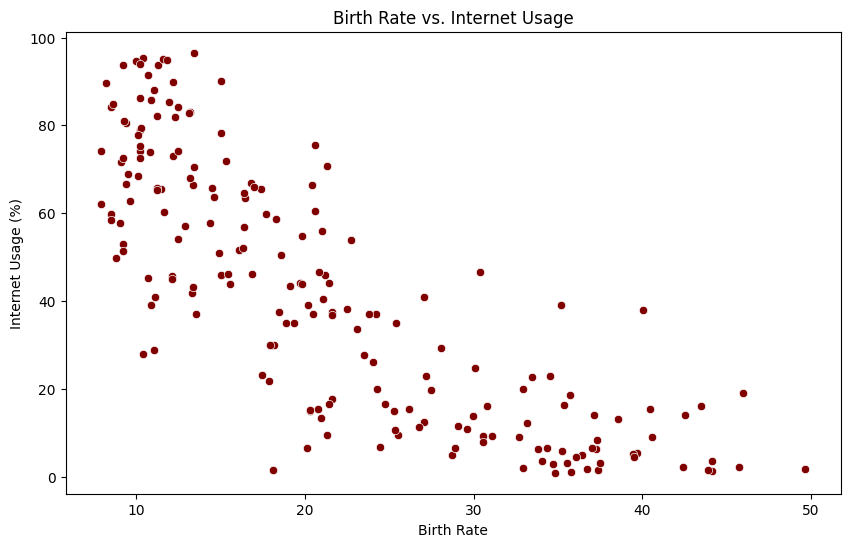

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=demo['Birth rate'], y=demo['Internet users'], color='maroon')
plt.title('Birth Rate vs. Internet Usage')
plt.xlabel('Birth Rate')
plt.ylabel('Internet Usage (%)')
plt.show()

<h1> Task 8 </h1>
<h2> Insight: The countries with a Birth rate greater than 40 are Angola, Burundi, Burkina Faso, Gambia, Mali, Niger, Nigeria, Somalia, Chad, Uganda, Congo, Dem. Rep, Zambia</h2>

In [29]:
high_br_countries = demo[demo['Birth rate'] > 40]
high_br_countries

,Country Name,Country Code,Birth rate,Internet users,Income Group
2,Angola,AGO,45.985,19.1,Upper middle income
11,Burundi,BDI,44.151,1.3,Low income
14,Burkina Faso,BFA,40.551,9.1,Low income
65,"Gambia, The",GMB,42.525,14.0,Low income
115,Mali,MLI,44.138,3.5,Low income
127,Niger,NER,49.661,1.7,Low income
128,Nigeria,NGA,40.045,38.0,Lower middle income
156,Somalia,SOM,43.891,1.5,Low income
167,Chad,TCD,45.745,2.3,Low income
178,Uganda,UGA,43.474,16.2,Low income


<h1> Task 9 </h1>
<h2> Insight: People with high incomes make up 34.4%, upper-middle-income earners make up 25.6%, lower-middle-income earners make up 24.6%, and those with low incomes make up 15.4%.</h2>

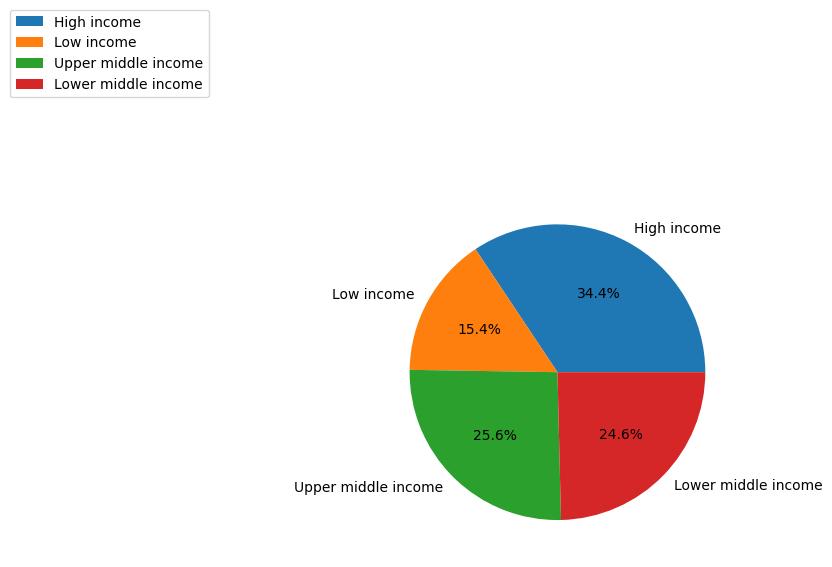

In [30]:
income = demo.groupby(['Income Group']).size()

plt.pie(income, autopct='%1.1f%%', labels = demo['Income Group'].unique())
plt.legend(loc='upper left', bbox_to_anchor=(-1, 1.5))
plt.show()

<h1> Task 10</h1>
<h2>Insihgts: There is no relationship or correlation between the birth rate and the number of internet users.</h2>

In [31]:
corr = demo['Birth rate'].corr(demo['Internet users'])
corr

np.float64(-0.8155885551284763)